<a href="https://colab.research.google.com/github/Swastik3025/Flower_Classification-using-Pretrained-VGG16/blob/main/Colab%20Notebook/Flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

 97% 235M/242M [00:01<00:00, 260MB/s]
100% 242M/242M [00:01<00:00, 196MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/5-flower-types-classification-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Flatten,Dense,Activation,Dropout
import os
import pathlib

In [5]:
path=pathlib.Path('/content/flower_images')
print("Dataset path copied")

Dataset path copied


In [6]:
classes=['Lilly','Lotus','Orchid','Sunflower','Tulip']
Lilly=list(path.glob('Lilly/*'))[:1000]
Lotus=list(path.glob('Lotus/*'))[:1000]
Orchid=list(path.glob('Orchid/*'))[:1000]
Sunflower=list(path.glob('Sunflower/*'))[:1000]
Tulip=list(path.glob('Tulip/*'))[:1000]

In [7]:
label_dict={'Lilly':Lilly,'Lotus':Lotus,'Orchid':Orchid,'Sunflower':Sunflower,'Tulip':Tulip}
print(label_dict)
labels={k:v for k,v in enumerate(label_dict.keys())}
print(labels)

{'Lilly': [PosixPath('/content/flower_images/Lilly/622ff376b1.jpg'), PosixPath('/content/flower_images/Lilly/909abffb3e.jpg'), PosixPath('/content/flower_images/Lilly/598e9f0c2d.jpg'), PosixPath('/content/flower_images/Lilly/e1822b1bf5.jpg'), PosixPath('/content/flower_images/Lilly/e0396476de.jpg'), PosixPath('/content/flower_images/Lilly/c23f05ede2.jpg'), PosixPath('/content/flower_images/Lilly/9228a9d2c4.jpg'), PosixPath('/content/flower_images/Lilly/0f402885f5.jpg'), PosixPath('/content/flower_images/Lilly/eafc51b9c3.jpg'), PosixPath('/content/flower_images/Lilly/1decdf8eaa.jpg'), PosixPath('/content/flower_images/Lilly/2e23773349.jpg'), PosixPath('/content/flower_images/Lilly/539cde3977.jpg'), PosixPath('/content/flower_images/Lilly/eeacc85ffb.jpg'), PosixPath('/content/flower_images/Lilly/b6fe1c6425.jpg'), PosixPath('/content/flower_images/Lilly/e2bd86354a.jpg'), PosixPath('/content/flower_images/Lilly/1eb93c8043.jpg'), PosixPath('/content/flower_images/Lilly/c2957bfb85.jpg'), Pos

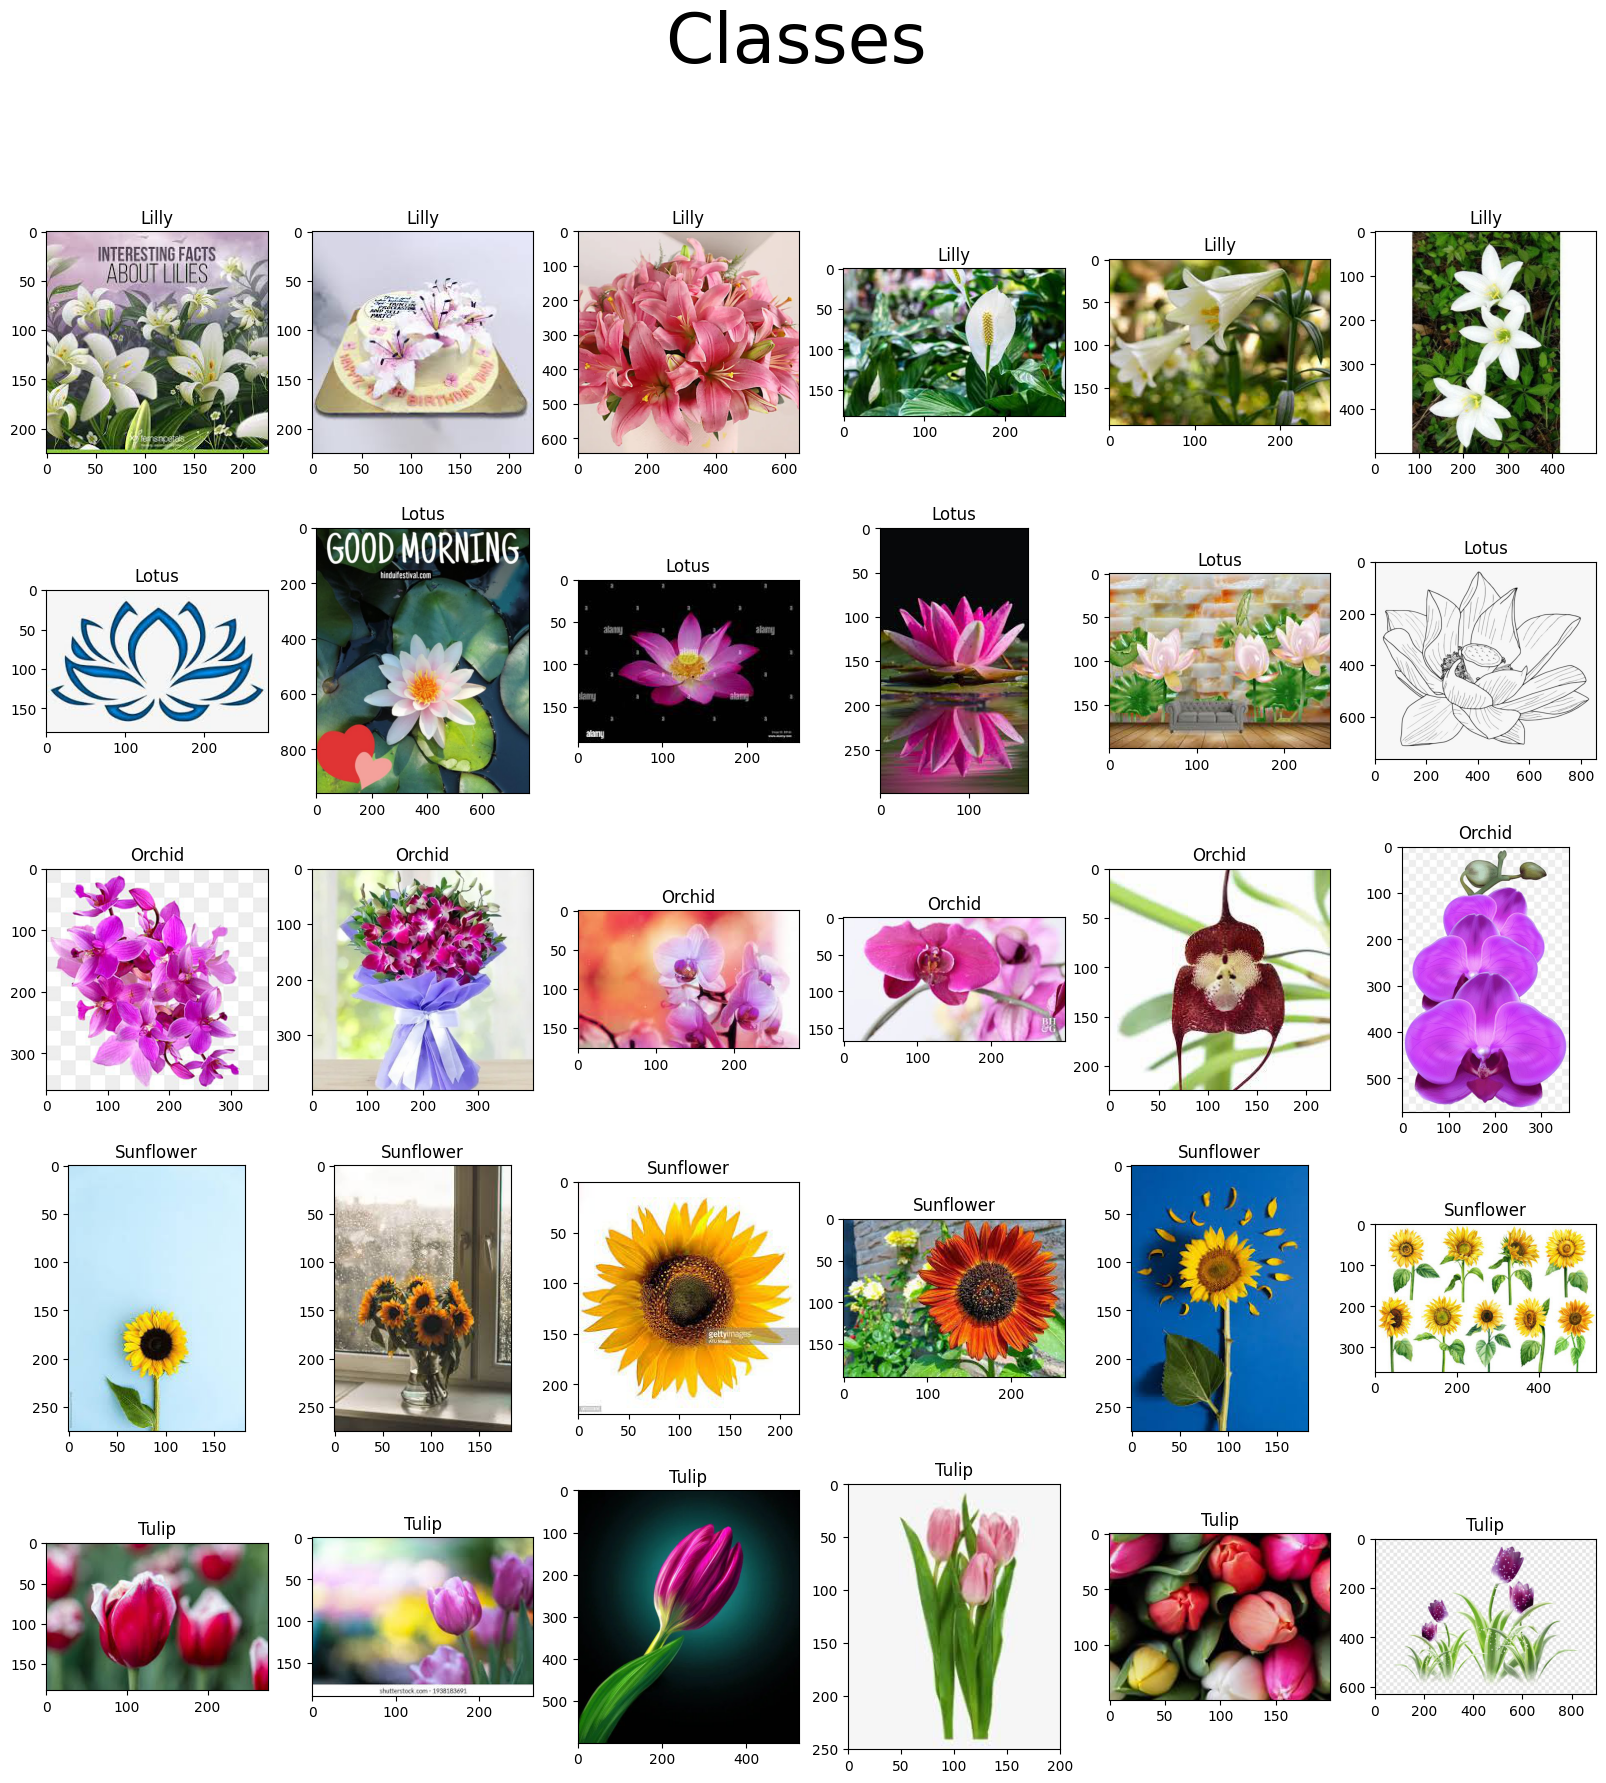

In [8]:
import matplotlib.image as img
fig,ax=plt.subplots(5,6,figsize=(20,20))
fig.suptitle('Classes',fontsize=50)
for i in range(5):
    for j in range(6):
        image=img.imread(label_dict.get(labels.get(i))[j])
        ax[i,j].imshow(image)
        ax[i,j].set_title(labels.get(i))

In [9]:
img_size=256
train_load=ImageDataGenerator(rescale=1./255,rotation_range=15,height_shift_range=0.1,width_shift_range=0.1,horizontal_flip=True,validation_split=0.2)

Training_set=train_load.flow_from_directory('/content/flower_images',target_size=(256,256),batch_size=32,class_mode='categorical',shuffle=True,subset='training')
Testing_set=train_load.flow_from_directory('/content/flower_images',target_size=(256,256),batch_size=1,shuffle=False,subset='validation')


Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [10]:
'''#Model Creation
model=Sequential()
# 1st Convolution layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolution layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd Convolution layer
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flattening and Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5,activation='softmax'))  #output layer

model.summary()'''

"#Model Creation\nmodel=Sequential()\n# 1st Convolution layer\nmodel.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(img_size,img_size,3)))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n# 2nd Convolution layer\nmodel.add(Conv2D(64,kernel_size=(3,3),activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n#3rd Convolution layer\nmodel.add(Conv2D(128,kernel_size=(3,3),activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n#Flattening and Fully Connected layers\nmodel.add(Flatten())\nmodel.add(Dense(512,activation='relu'))\nmodel.add(Dense(32,activation='relu'))\nmodel.add(Dropout(0.4))\nmodel.add(Dense(5,activation='softmax'))  #output layer\n\nmodel.summary()"

In [11]:
'''# Model Architecture
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)'''

'# Model Architecture\nfrom keras.utils import plot_model\nplot_model(model,show_shapes=True,show_layer_names=True)'

In [12]:
'''model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print('Model Compilation successful!')'''

"model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])\nprint('Model Compilation successful!')"

In [13]:
'''history=model.fit(Training_set,epochs=20,validation_data=Testing_set,shuffle=True)'''

'history=model.fit(Training_set,epochs=20,validation_data=Testing_set,shuffle=True)'

In [14]:
'''#Accuracy Graphs
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()'''

'#Accuracy Graphs\nacc=history.history[\'accuracy\']\nval_acc=history.history[\'val_accuracy\']\nepochs=range(len(acc))\nplt.plot(epochs,acc,\'r\',label="Training Accuracy")\nplt.plot(epochs,val_acc,\'b\',label="Validation Accuracy")\nplt.xlabel(\'Epoch\')\nplt.ylabel(\'Accuracy\')\nplt.legend()\nplt.show()'

In [15]:
'''#loss graphs
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()'''

'#loss graphs\nloss=history.history[\'loss\']\nval_loss=history.history[\'val_loss\']\nepochs=range(len(loss))\nplt.plot(epochs,loss,\'r\',label="Training Loss")\nplt.plot(epochs,val_loss,\'b\',label="Validation Loss")\nplt.xlabel(\'Epoch\')\nplt.ylabel(\'Loss\')\nplt.legend()\nplt.show()'

In [16]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [17]:
base_model=VGG16(input_shape=(256, 256, 3),include_top=False,weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [18]:
for layer in base_model.layers:
    layer.trainable=False

In [19]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [20]:
custom_model = Sequential()

custom_model.add(base_model)
custom_model.add(global_average_layer)
custom_model.add(Dense(512, activation="relu"))
custom_model.add(Dropout(0.4))
custom_model.add(Dense(5, activation="softmax"))

custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 14,979,909
Trainable params: 265,221
Non-trainable params: 14,714,688
______________________________________

In [21]:
custom_model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
logdir = "logs"
# directory where all the model training stages (checkpoints) will be added

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
history=custom_model.fit(Training_set,epochs=15,validation_data=Testing_set,callbacks=[tensorboard_callback])

Epoch 1/15
125/125 [==============================] - 126s 886ms/step - loss: 1.1678 - accuracy: 0.5497 - val_loss: 0.8526 - val_accuracy: 0.7250
Epoch 2/15
125/125 [==============================] - 111s 885ms/step - loss: 0.8064 - accuracy: 0.7172 - val_loss: 0.6883 - val_accuracy: 0.7810
Epoch 3/15
125/125 [==============================] - 112s 895ms/step - loss: 0.6957 - accuracy: 0.7535 - val_loss: 0.6065 - val_accuracy: 0.8000
Epoch 4/15
125/125 [==============================] - 128s 1s/step - loss: 0.6332 - accuracy: 0.7688 - val_loss: 0.5951 - val_accuracy: 0.8060
Epoch 5/15
125/125 [==============================] - 128s 1s/step - loss: 0.5893 - accuracy: 0.7895 - val_loss: 0.5657 - val_accuracy: 0.7960
Epoch 6/15
125/125 [==============================] - 109s 870ms/step - loss: 0.5554 - accuracy: 0.7950 - val_loss: 0.5137 - val_accuracy: 0.8250
Epoch 7/15
125/125 [==============================] - 110s 878ms/step - loss: 0.5249 - accuracy: 0.8108 - val_loss: 0.4977 - val_a

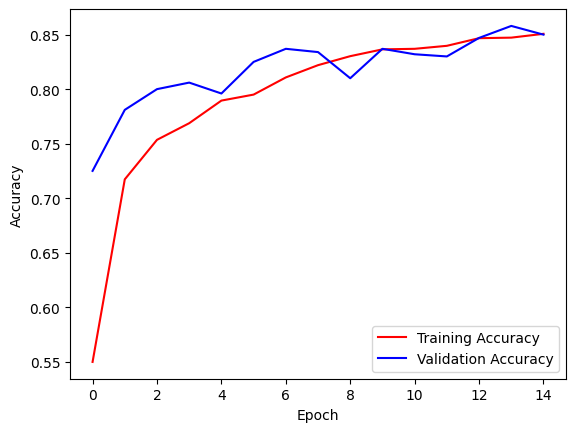

In [24]:
#Accuracy Graphs
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

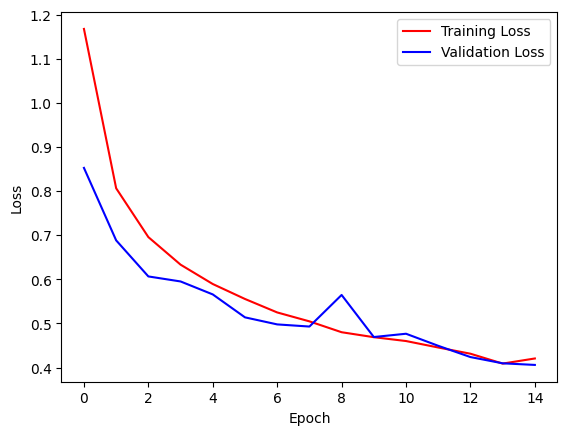

In [25]:
#loss graphs
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
#saving the model
from keras.models import save_model
save_model(custom_model,'/content/drive/MyDrive/Flower_class.h5')

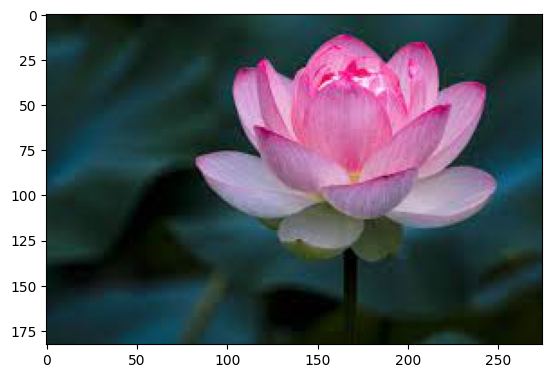

In [29]:
import cv2
test_img = cv2.imread("/content/lotus.jpg")
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))
plt.show()

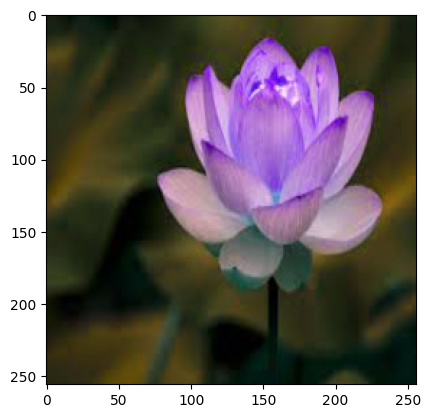

In [30]:
resize_test=tf.image.resize(test_img,(256,256))
plt.imshow(resize_test.numpy().astype(int))
plt.show()

In [31]:
resize_test.shape, np.expand_dims(resize_test/255.0, 0).shape

(TensorShape([256, 256, 3]), (1, 256, 256, 3))

In [33]:
yhat=tf.math.argmax(custom_model.predict(np.expand_dims(resize_test/255.0, 0)), axis=1)

1/1 [==============================] - 0s 34ms/step


In [34]:
yhat

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>

In [35]:
print("Predicted class is",classes[yhat[0]])

Predicted class is Lotus


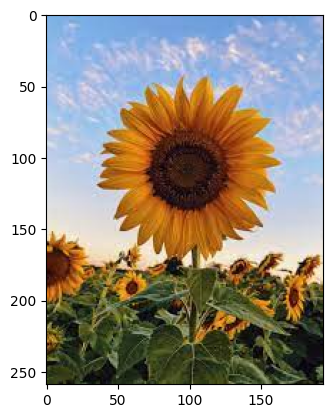

In [40]:
test_img_2=cv2.imread("/content/sunflower.jpg")
plt.imshow(cv2.cvtColor(test_img_2,cv2.COLOR_BGR2RGB))
plt.show()

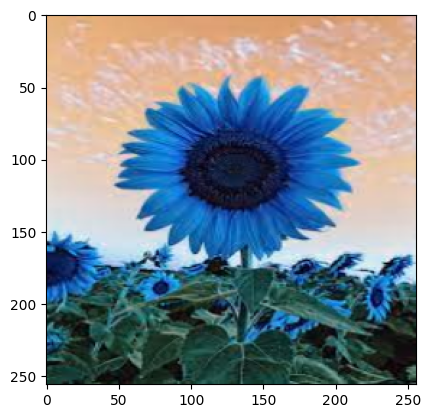

In [41]:
resize_test_2=tf.image.resize(test_img_2,(256,256))
plt.imshow(resize_test_2.numpy().astype(int))
plt.show()

In [42]:
resize_test_2.shape,np.expand_dims(resize_test_2/255.0, 0).shape

(TensorShape([256, 256, 3]), (1, 256, 256, 3))

In [44]:
yhat_2=tf.math.argmax(custom_model.predict(np.expand_dims(resize_test_2/255.0,0)),axis=1)

1/1 [==============================] - 0s 33ms/step


In [45]:
print("Predicted class is",classes[yhat_2[0]])

Predicted class is Sunflower
